In [2]:
import geopandas as gpd
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import os


# Data source https://data.humdata.org/dataset/worldriskindex

In [6]:
# parsing all the input files
year_fn = {}
root = 'C:/Users/ASUS/Downloads/worldriskindex-datasets'
for fn in os.listdir(root):
    if '20' in fn:
        year = int(fn.split('-')[-1].split('.')[0])
        year_fn[year] = root + '/' + fn

In [16]:
# Load the country-level shapefile from Natural Earth
world = gpd.read_file('C:/Users/ASUS/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world = world.to_crs("+proj=moll +lon_0=0 +datum=WGS84 +units=m +no_defs")

oceans = gpd.read_file('C:/Users/ASUS/Downloads/ne_10m_ocean/ne_10m_ocean.shp')
oceans = oceans.to_crs("+proj=moll +lon_0=0 +datum=WGS84 +units=m +no_defs")

# creatin a colormap
# Load the country-level shapefile from Natural Earth
world = gpd.read_file('C:/Users/ASUS/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world = world.to_crs("+proj=moll +lon_0=0 +datum=WGS84 +units=m +no_defs")

oceans = gpd.read_file('C:/Users/ASUS/Downloads/ne_10m_ocean/ne_10m_ocean.shp')
oceans = oceans.to_crs("+proj=moll +lon_0=0 +datum=WGS84 +units=m +no_defs")

Text(0.5, 1.0, 'Economic Disparities,    2021')

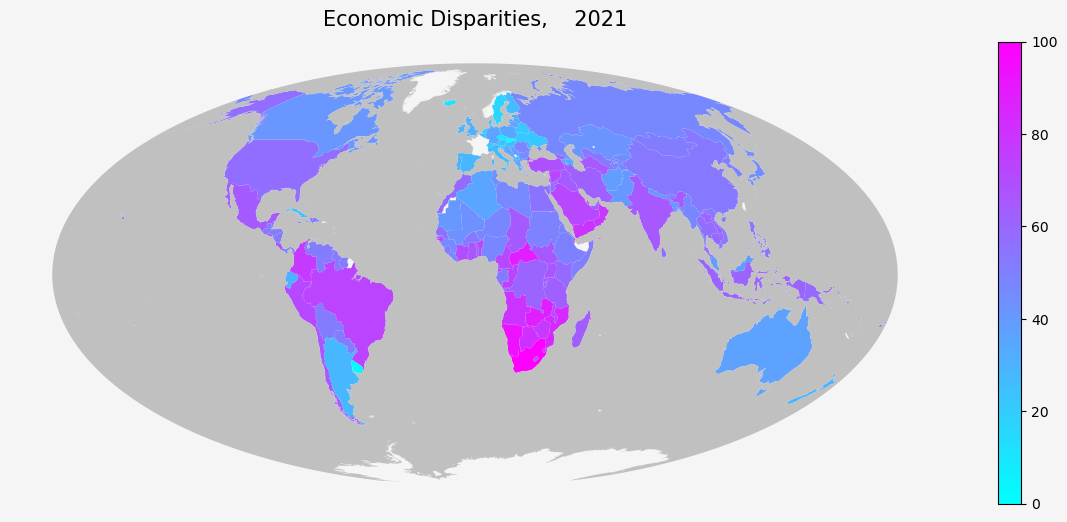

In [26]:
# creating a test map
# SI_09 Economic Disparities Indicator Years 2021 United Nations Population Division World Population Prospects 2022 30/ Apr 2024 https://population.un.org/wpp/
year = 2021
df = pd.read_csv(year_fn[year])
world_ = world.merge(df, left_on = 'ISO_A3', right_on = 'ISO3')[['SI_09', 'geometry']]

f, ax = plt.subplots(1,1,figsize=(15,6))
world_.plot(column = 'SI_09',
            legend = True,
            cmap = "cool",
            ax = ax,
            vmin = 0,
            vmax = 100)

# Set a vintage parchment color background
bcg = '#F5F5F5'
f.patch.set_facecolor(bcg)
ax.set_facecolor(bcg)

oceans.plot(ax=ax, color = '#C0C0C0')

# Remove axes for a cleaner look
ax.axis('off')
ax.set_title('Economic Disparities,    ' + str(year), loc='center', fontsize=15, pad=12)

In [30]:
# creating all the snapshot maps and the animation
foldout = 'snapshots'
if not os.path.exists(foldout): os.makedirs(foldout)

for year in sorted(year_fn.keys()):

    print(year)
    df = pd.read_csv(year_fn[year])
    if 'ISO3' in df.keys():

        world_ = world.merge(df, left_on = 'ISO_A3', right_on = 'ISO3')[['SI_09', 'geometry']]
        f, ax = plt.subplots(1,1,figsize=(15,6))
        world_.plot(column = 'SI_09', legend = True, cmap = "cool", ax = ax, vmin = 0, vmax = 100)
        bcg = '#F5F5F5'
        f.patch.set_facecolor(bcg)
        ax.set_facecolor(bcg)
        oceans.plot(ax=ax, color = '#C0C0C0')
        ax.axis('off')
        ax.set_title('Economic Disparities,    ' + str(year), loc='center', fontsize=15, pad=12)
        plt.savefig(foldout + '/' + str(year) + '.png', dpi = 150, facecolor = bcg, bbox_inches = 'tight')
        plt.close()


from PIL import Image, ImageDraw

png_files = [f for f in os.listdir(foldout) if f.endswith('.png')]
png_files.sort()

frames = []
for png_file in png_files:
    file_path = os.path.join(foldout, png_file)
    img = Image.open(file_path)
    frames.append(img)


frame_duration = 60
crossfade_frames = 4
crossfaded_frames = []

for i in range(len(frames) - 1):
    current_frame = frames[i]
    next_frame = frames[i + 1]

    for j in range(crossfade_frames + 1):
        alpha = j / crossfade_frames
        blended_frame = Image.blend(current_frame, next_frame, alpha)
        crossfaded_frames.append(blended_frame)

crossfaded_frames.append(frames[-1])
output_gif_path = 'animation.gif'
crossfaded_frames[0].save( output_gif_path, save_all=True,
                          append_images=crossfaded_frames[1:], duration=frame_duration, loop=0 )

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
